# Stock Market Prediction

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting 
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [2]:
tesla=pd.read_csv("C:\\Users\\ppvsv\\Downloads\\archive (2).zip")
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [4]:
tesla['Date']=pd.to_datetime(tesla['Date'])

In [5]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days= {(tesla.Date.max()-tesla.Date.min()).days}days')


Dataframe contains stock prices between 2010-06-29 00:00:00 2020-02-03 00:00:00
Total days= 3506days


In [6]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


<AxesSubplot:>

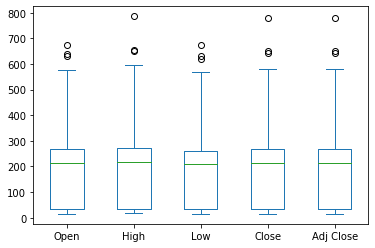

In [7]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
#setting the Layout for our plot
layout=go.Layout(
                              
xaxis=dict(
title='Date',
titlefont=dict(
family='Courier New,monospace',
size=18,
color='#7f7f7f'
)

),
    yaxis=dict(
    title='Price',
        titlefont=dict(
        family='Courier New,monospace',
size=18,
color='#7f7f7f'
        )
    )
)

tesla_data=[{'x':tesla['Date'],'y':tesla['Close']}]
plot=go.Figure(data=tesla_data, layout=layout)

In [9]:
#plot(plot)  #plotting offline
iplot(plot)

In [16]:
#Building the regression Model
from sklearn.model_selection import train_test_split

#For prepprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [18]:
#split the data into train and test sets
X=np.array(tesla.index).reshape(-1,1)
Y=tesla['Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [19]:
#feature Scaling
scaler=StandardScaler().fit(X_train)


In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
#creating a linear model
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [29]:
#plot actual and predicted values for train dataset
trace0=go.Scatter(
x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='Predicted'
)
tesla_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=tesla_data,layout=layout)

In [30]:
iplot(plot2)

In [32]:
#Calculate scores for model evalution 
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.788228331751714	0.8024543287892049
MSE       3018.796360995388	2768.704187535219

